# Problem Statement

Let's assume that you work as a consultant to a start-up company that has just started to hire employees. The HR director reached out to you and asked you to predict the salary of employees based on the number of years of experience. You suggested to use a polynomial regression model to try to create a model using the provided dataset. 

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset

df = pd.read_csv('Employee_Salary.csv')
df.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [3]:
# Getting the Descriptive Summary Statistics

df.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [4]:
# Get the Info of Each columns in the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Years of Experience    2000 non-null float64
Salary                 2000 non-null float64
dtypes: float64(2)
memory usage: 31.4 KB


In [5]:
# Identify is there are any missing value in the dataframe

pd.DataFrame({'Columns':df.isna().sum().index, 'No. of Missing Values': df.isna().sum().values, '% Missing': \
              df.isna().sum().values/len(df)})

,Columns,No. of Missing Values,% Missing
0,Years of Experience,0,0.0
1,Salary,0,0.0


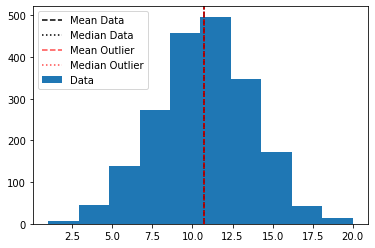

In [6]:
# Visualize the Mean, Median, Mode of the Dataset via Histogram

# Plot Histogram for Years of Experience

plt.hist(df['Years of Experience'], label= "Data");
plt.axvline(np.mean(df['Years of Experience']), c='k', ls= "--", label= "Mean Data");
plt.axvline(np.median(df['Years of Experience']), c='k', ls= ":", label= "Median Data");
plt.axvline(np.mean(df['Years of Experience']), c='r', ls= "--", label= "Mean Outlier", alpha= 0.7);
plt.axvline(np.median(df['Years of Experience']), c='r', ls= ":", label= "Median Outlier", alpha= 0.7);

plt.legend();
plt.show();

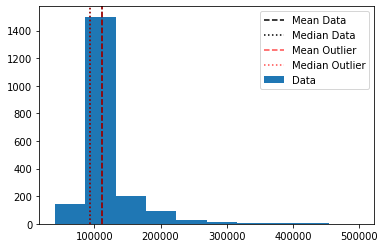

In [7]:
# Plot Histogram for Fuel Economy (MPG)

plt.hist(df['Salary'], label= "Data");
plt.axvline(np.mean(df['Salary']), c='k', ls= "--", label= "Mean Data");
plt.axvline(np.median(df['Salary']), c='k', ls= ":", label= "Median Data");
plt.axvline(np.mean(df['Salary']), c='r', ls= "--", label= "Mean Outlier", alpha= 0.7);
plt.axvline(np.median(df['Salary']), c='r', ls= ":", label= "Median Outlier", alpha= 0.7);

plt.legend();
plt.show();

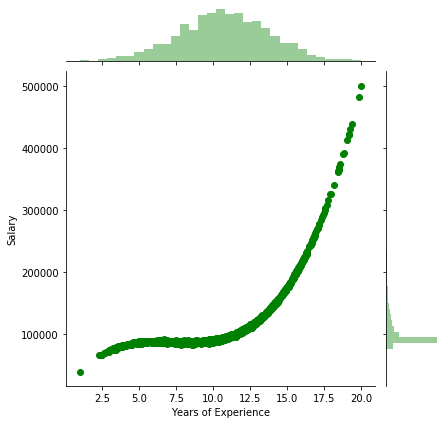

In [8]:
# Using Jointplot to Visualize the Distribution and Scatter

sns.jointplot(x='Years of Experience', y='Salary', data = df, color = 'green');

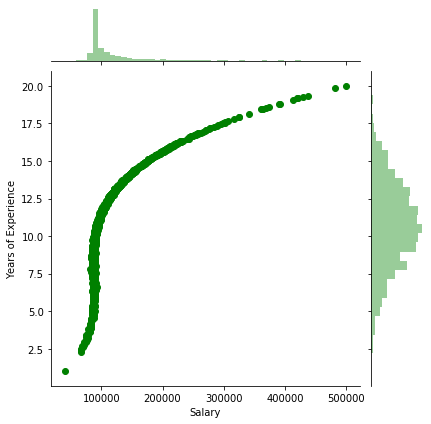

In [9]:
# Using Jointplot to Visualize the Distribution and Scatter

sns.jointplot(y='Years of Experience', x='Salary', data = df, color = 'green');

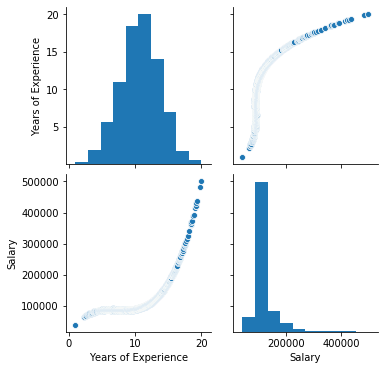

In [10]:
# Use PairPlot to visualize the paired data

sns.pairplot(df);

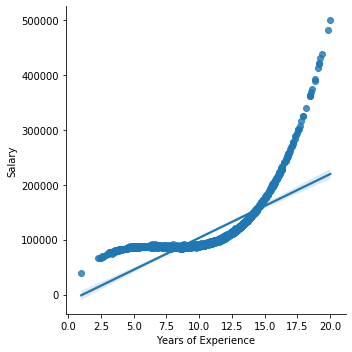

In [11]:
# Add Just a Straightline to data

sns.lmplot(x='Years of Experience', y='Salary', data= df);
# It Just Fits a line to Data, not via any mathematical modelling

#### We Can see that the Straight line is not fitting the Data well. So we need to use Polynomial Regression to get the bestfit line in the Dataset

### Modelling of Machine Learning


In [12]:
X = df[["Years of Experience"]] # This is a DataFrame
y = df["Salary"] # This can be a Series

#### Here, in Polynomial Regression, we are not going to divide Data into Train and Test, we just try to get the best fit model. Going further in Advance, we then split the data into training set and test set

### Try using Linear Regression

Linear Model Coefficient with Intercept (m):  [11640.22916165]
Linear Model Coefficient with Intercept (b):  -13063.099315186962
Linear Model Coefficient with No Intercept (m):  [10511.28514602]
Linear Model Coefficient with No Intercept (b):  0.0


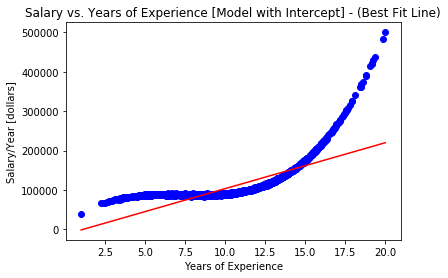

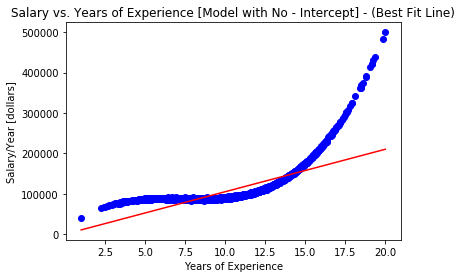

In [19]:
from sklearn.linear_model import LinearRegression

# Apply Linear Regression Model with Intercept
regressor1 = LinearRegression(fit_intercept = True)
regressor1.fit(X,y)

# Apply Linear Regression Model with No Intercept
regressor2 = LinearRegression(fit_intercept = False)
regressor2.fit(X,y)

# Getting the Coefficients

print('Linear Model Coefficient with Intercept (m): ', regressor1.coef_)
print('Linear Model Coefficient with Intercept (b): ', regressor1.intercept_)

print('Linear Model Coefficient with No Intercept (m): ', regressor2.coef_)
print('Linear Model Coefficient with No Intercept (b): ', regressor2.intercept_)

# Visualize the Model - For Model with Intercept

plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor1.predict(X), color = 'red')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience [Model with Intercept] - (Best Fit Line)');
plt.show();
# Visualize the Model - For Model with No Intercept

plt.scatter(X, y, color = 'blue')
plt.plot(X, regressor2.predict(X), color = 'red')
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience [Model with No - Intercept] - (Best Fit Line)');
plt.show();

#### Here, when Fitting by Linear Regression, the Error is very Large. So we use Polynomial Regression here

### Using Polynomial Regression

In [32]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate the Class
poly_regressor_2 = PolynomialFeatures(degree= 2)
poly_regressor_5 = PolynomialFeatures(degree= 5)
poly_regressor_7 = PolynomialFeatures(degree= 7)

In [33]:
X.head()

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729


https://www.youtube.com/watch?v=nGcMl03LPC0

In [40]:
# Fit the Data

X_columns = poly_regressor_2.fit_transform(X) # Transforms a Single Column (X) into Multiple Array of Features
X_columns[:5] # It Contains Original Features with Associated Polynomial Times - (1, x, x square) If Degree 2

array([[1.        , 1.        , 1.        ],
       [1.        , 2.25794198, 5.09830199],
       [1.        , 2.45087546, 6.00679053],
       [1.        , 2.49871291, 6.24356618],
       [1.        , 2.61372878, 6.83157816]])

In [41]:
# Fit for All Orders

X_columns_5 = poly_regressor_5.fit_transform(X) # Transforms a Single Column (X) into Multiple Array of Features
X_columns_7 = poly_regressor_7.fit_transform(X)

In [42]:
# Now Use Linear Regression Model to the polynomial Dataset

regressor_2 = LinearRegression()
regressor_5 = LinearRegression()
regressor_7 = LinearRegression()

# Fit the LR Model
regressor_2.fit(X_columns, y)
regressor_5.fit(X_columns_5, y)
regressor_7.fit(X_columns_7, y)


print('2nd Order Polynomial Model Coefficient (m): ', regressor.coef_)
print('2nd Order Polynomial Model Coefficient (b): ', regressor.intercept_)

2nd Order Polynomial Model Coefficient (m):  [     0.         -33106.32895617   2095.78613853]
2nd Order Polynomial Model Coefficient (b):  207045.95366531375


### Visualising the Data

In [43]:
# 2 Ways to Pass the Input

print(regressor_2.predict(X_columns))
print(regressor_2.predict( poly_regressor.fit_transform(X) ))

[176035.41084767 142978.73429447 138495.41274285 ... 351309.70152322
 375297.5979639  383233.82995221]
[176035.41084767 142978.73429447 138495.41274285 ... 351309.70152322
 375297.5979639  383233.82995221]


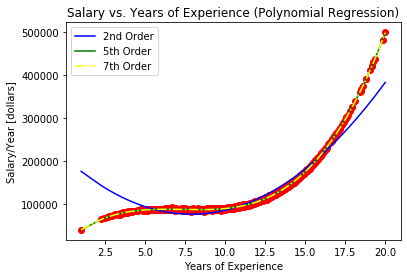

In [56]:
# Plotting the Results

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor_2.predict(X_columns), color = 'blue', label= "2nd Order")
plt.plot(X, regressor_5.predict(X_columns_5), color = 'green', label= "5th Order")
plt.plot(X, regressor_7.predict(X_columns_7), color = 'yellow', ls= "-.", label= "7th Order")
plt.ylabel('Salary/Year [dollars]')
plt.xlabel('Years of Experience')
plt.title('Salary vs. Years of Experience (Polynomial Regression)');
plt.legend();